# Loan Application Status Prediction

Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 



Independent Variables:

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv'
df=pd.read_csv(url)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Encoding the dataframe

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [9]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df['LoanAmount']=df['LoanAmount'].fillna(np.mean(df['LoanAmount']))

In [11]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [12]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(np.mean(df['Loan_Amount_Term']))

In [13]:
df['Credit_History']=df['Credit_History'].fillna(np.mean(df['Credit_History']))

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
df.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

# Visualization of data

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

1    422
0    192
Name: Loan_Status, dtype: int64


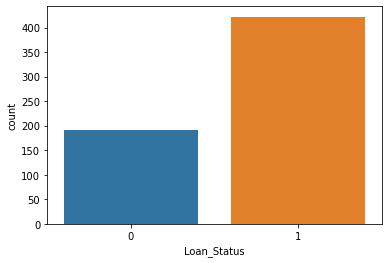

In [17]:
sns.countplot(x='Loan_Status',data=df)
print(df['Loan_Status'].value_counts())

<AxesSubplot:xlabel='Loan_ID', ylabel='Count'>

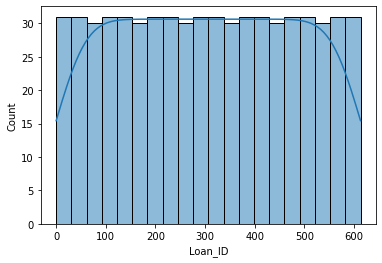

In [18]:
sns.histplot(x='Loan_ID',data=df,kde=True,bins=20)

1    489
0    112
2     13
Name: Gender, dtype: int64


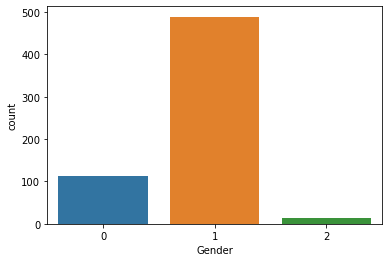

In [19]:
sns.countplot(x='Gender',data=df)
print(df['Gender'].value_counts())

1    398
0    213
2      3
Name: Married, dtype: int64


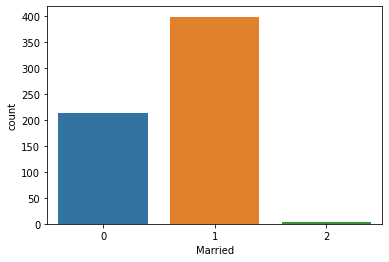

In [20]:
sns.countplot(x='Married',data=df)
print(df['Married'].value_counts())

0    345
1    102
2    101
3     51
4     15
Name: Dependents, dtype: int64


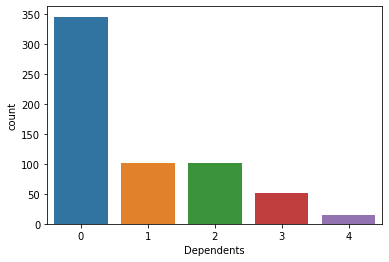

In [21]:
sns.countplot(x='Dependents',data=df)
print(df['Dependents'].value_counts())

0    480
1    134
Name: Education, dtype: int64


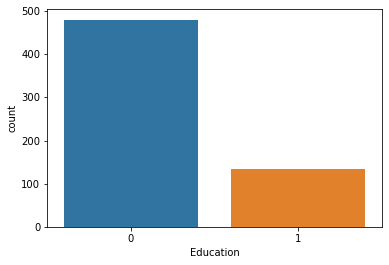

In [22]:
sns.countplot(x='Education',data=df)
print(df['Education'].value_counts())

0    500
1     82
2     32
Name: Self_Employed, dtype: int64


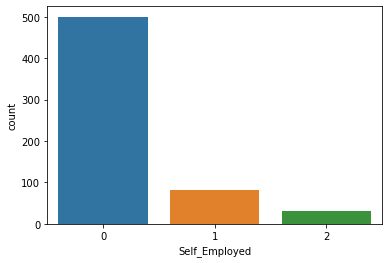

In [23]:
sns.countplot(x='Self_Employed',data=df)
print(df['Self_Employed'].value_counts())

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

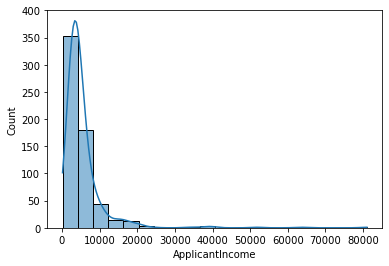

In [24]:
sns.histplot(x='ApplicantIncome',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

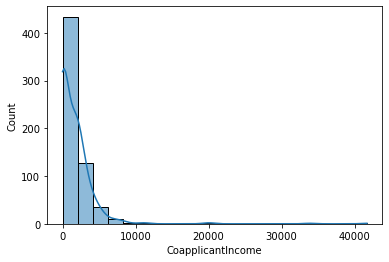

In [25]:
sns.histplot(x='CoapplicantIncome',bins=20,data=df,kde=True)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

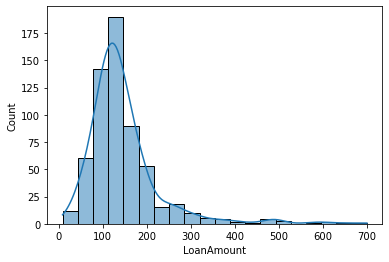

In [26]:
sns.histplot(x='LoanAmount',bins=20,data=df,kde=True)

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


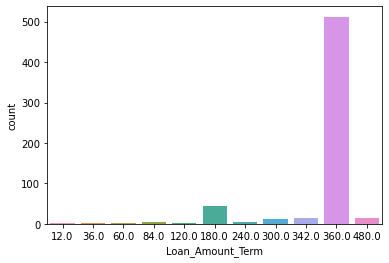

In [27]:
sns.countplot(x='Loan_Amount_Term',data=df)
print(df['Loan_Amount_Term'].value_counts())

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64


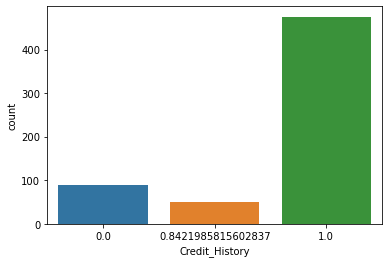

In [28]:
sns.countplot(x='Credit_History',data=df)
print(df['Credit_History'].value_counts())

1    233
2    202
0    179
Name: Property_Area, dtype: int64


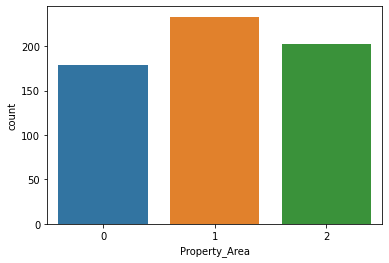

In [29]:
sns.countplot(x='Property_Area',data=df)
print(df['Property_Area'].value_counts())

# Describing the Datasets

In [30]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.838762,0.657980,0.842020,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,177.390811,0.421752,0.484971,1.120531,0.413389,0.534737,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


<AxesSubplot:>

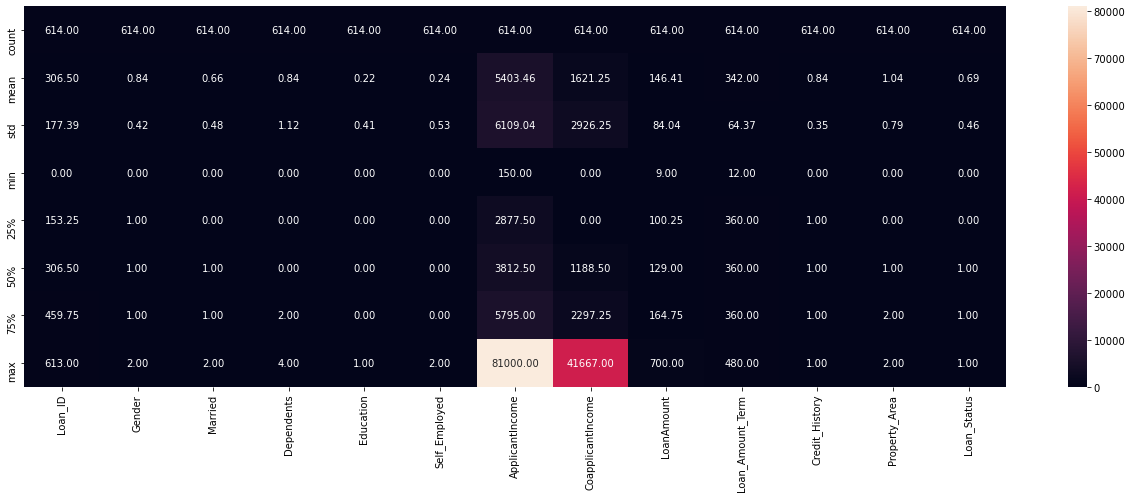

In [31]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',data=df)

In [32]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.007403,-0.018621,0.055139,0.039442,0.005039,0.016925,0.039211,0.035684,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.007403,1.000000,0.336094,0.149674,0.024382,-0.025022,0.094472,0.073308,0.136081,-0.067778,-0.000490,-0.030903,0.008690
Married,-0.018621,0.336094,1.000000,0.338689,0.006759,-0.038153,0.052119,0.069877,0.145541,-0.096253,0.010302,0.007973,0.096657
Dependents,0.055139,0.149674,0.338689,1.000000,0.060466,0.005622,0.103416,0.011146,0.130722,-0.073683,-0.077539,0.032600,-0.007318
Education,0.039442,0.024382,0.006759,0.060466,1.000000,-0.021130,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.005039,-0.025022,-0.038153,0.005622,-0.021130,1.000000,0.095664,0.052218,0.089806,-0.036965,0.052701,-0.013439,0.010880
ApplicantIncome,0.016925,0.094472,0.052119,0.103416,-0.140760,0.095664,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.073308,0.069877,0.011146,-0.062290,0.052218,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.035684,0.136081,0.145541,0.130722,-0.166998,0.089806,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.067778,-0.096253,-0.073683,-0.077242,-0.036965,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974


<AxesSubplot:>

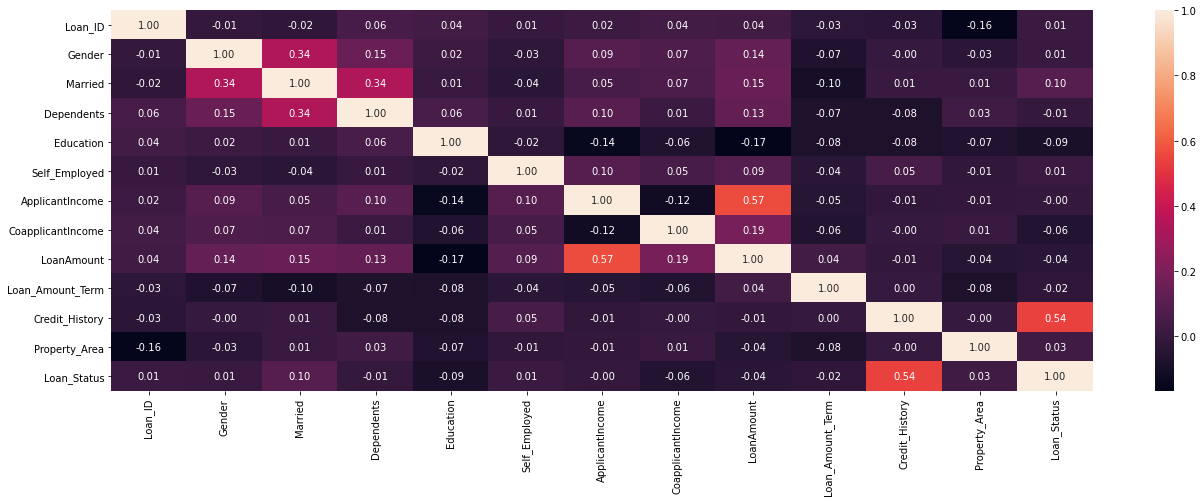

In [33]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,data=df,fmt='0.2f')

# Outliers Checking

In [34]:
df.skew()

Loan_ID              0.000000
Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

except Loan_ID,Married and Property_Area eveyother column doesn't comes between +\- 0.5 threshold range

<AxesSubplot:>

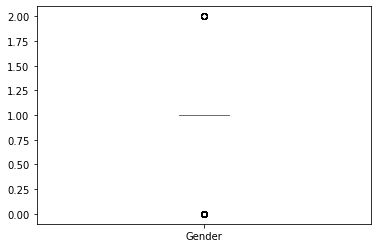

In [35]:
df['Gender'].plot.box()

<AxesSubplot:>

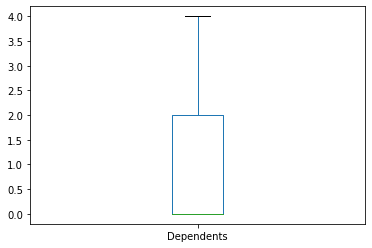

In [36]:
df['Dependents'].plot.box()

<AxesSubplot:>

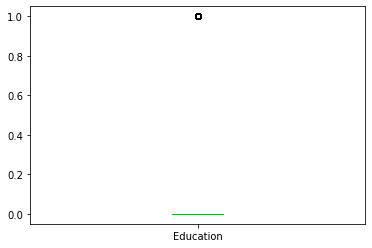

In [37]:
df['Education'].plot.box()

<AxesSubplot:>

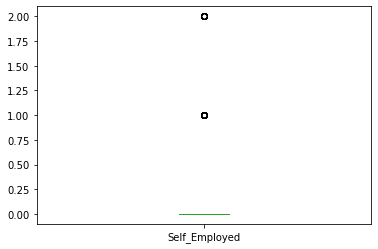

In [38]:
df['Self_Employed'].plot.box()

<AxesSubplot:>

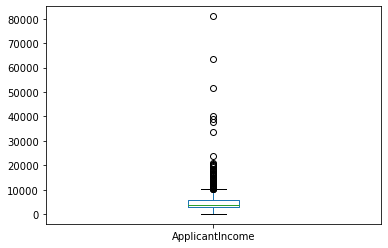

In [39]:
df['ApplicantIncome'].plot.box()

<AxesSubplot:>

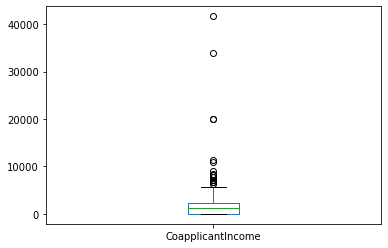

In [40]:
df['CoapplicantIncome'].plot.box()

<AxesSubplot:>

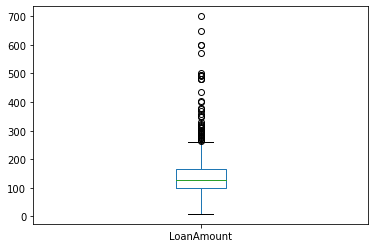

In [41]:
df['LoanAmount'].plot.box()

<AxesSubplot:>

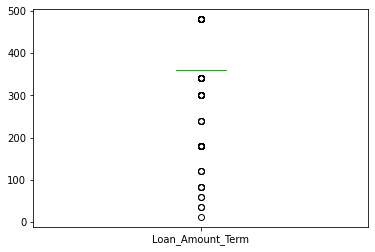

In [42]:
df['Loan_Amount_Term'].plot.box()

<AxesSubplot:>

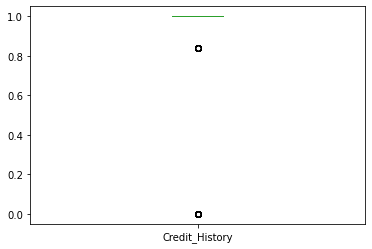

In [43]:
df['Credit_History'].plot.box()

<AxesSubplot:>

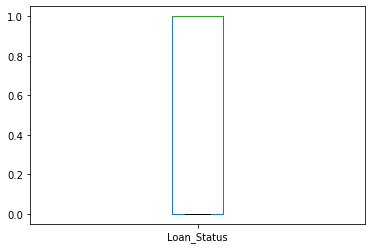

In [44]:
df['Loan_Status'].plot.box()

# Outliers removal

In [45]:
df.shape

(614, 13)

In [46]:
from scipy.stats import zscore

In [47]:
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  9,  11,  14,  19,  24,  29,  30,  68,  94,  95, 107, 111, 114,
        126, 130, 133, 155, 155, 158, 170, 171, 171, 177, 177, 183, 185,
        218, 231, 236, 242, 262, 268, 278, 295, 308, 313, 333, 333, 333,
        336, 344, 369, 374, 380, 385, 402, 409, 411, 417, 432, 432, 443,
        447, 463, 468, 487, 495, 497, 506, 523, 525, 535, 542, 546, 561,
        575, 579, 581, 585, 600, 600, 601, 604]),
 array([7, 5, 9, 5, 5, 5, 5, 9, 9, 5, 5, 5, 5, 6, 8, 9, 6, 8, 5, 5, 6, 8,
        7, 8, 6, 6, 5, 5, 5, 9, 9, 5, 8, 5, 8, 9, 5, 6, 8, 5, 5, 8, 5, 5,
        5, 7, 6, 5, 7, 5, 8, 6, 5, 5, 5, 8, 9, 9, 8, 8, 8, 5, 5, 9, 8, 9,
        5, 7, 9, 5, 7, 5, 8]))

In [48]:
df_new=df[(z<3).all(axis=1)]
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


percentage data loss

In [49]:
data_loss=((614-548)/614)*100
data_loss

10.749185667752444

# Separating x and y

In [50]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [51]:
from sklearn.preprocessing import power_transform

In [52]:
x=power_transform(x,method='yeo-johnson')
x

array([[-2.15624076,  0.31016067, -1.33546089, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [-2.1312907 ,  0.31016067,  0.68470219, ...,  0.18590509,
         0.51406263, -1.35000343],
       [-2.10987278,  0.31016067,  0.68470219, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       ...,
       [ 1.5456009 ,  0.31016067,  0.68470219, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [ 1.54994198,  0.31016067,  0.68470219, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [ 1.554281  , -1.80965324, -1.33546089, ...,  0.18590509,
        -2.2471956 ,  0.00236103]])

# Scaling the data

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.15624076,  0.31016067, -1.33546089, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [-2.1312907 ,  0.31016067,  0.68470219, ...,  0.18590509,
         0.51406263, -1.35000343],
       [-2.10987278,  0.31016067,  0.68470219, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       ...,
       [ 1.5456009 ,  0.31016067,  0.68470219, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [ 1.54994198,  0.31016067,  0.68470219, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [ 1.554281  , -1.80965324, -1.33546089, ...,  0.18590509,
        -2.2471956 ,  0.00236103]])

since label is having only two so binary classification

In [54]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [55]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state',i,'The model performs very well")
        print("At random state :-",i)
        print("Training r2_score is :-",accuracy_score(y_train,pred_train)*100)
        print("Training r2_score is :-",accuracy_score(y_test,pred_test)*100)

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=712)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.60      0.27      0.37        45
           1       0.68      0.90      0.77        78

    accuracy                           0.67       123
   macro avg       0.64      0.58      0.57       123
weighted avg       0.65      0.67      0.63       123



# Cross validation for LogisticRegression

In [58]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv :- ",j)
    print("Cross validation score is :-",lsc*100)
    print("accuracy_score is :-",lss*100)
    print("\n")

At cv :-  2
Cross validation score is :- 79.80456026058633
accuracy_score is :- 78.04878048780488


At cv :-  3
Cross validation score is :- 79.48350071736013
accuracy_score is :- 78.04878048780488


At cv :-  4
Cross validation score is :- 79.1581784228843
accuracy_score is :- 78.04878048780488


At cv :-  5
Cross validation score is :- 79.32027189124351
accuracy_score is :- 78.04878048780488


At cv :-  6
Cross validation score is :- 79.31975379148423
accuracy_score is :- 78.04878048780488


At cv :-  7
Cross validation score is :- 79.97648902821317
accuracy_score is :- 78.04878048780488


At cv :-  8
Cross validation score is :- 79.32117224880383
accuracy_score is :- 78.04878048780488


At cv :-  9
Cross validation score is :- 79.15601023017902
accuracy_score is :- 78.04878048780488




Since cross validation and accuracy score is almost similar we heading towards a good approach

In [59]:
lsscore_selected=cross_val_score(lr,x,y,cv=2).mean()
print("The cv score is: ",lsscore_selected,"\n The accuracy_score is: ",lss)


The cv score is:  0.7980456026058632 
 The accuracy_score is:  0.7804878048780488


# AUC ROC curve

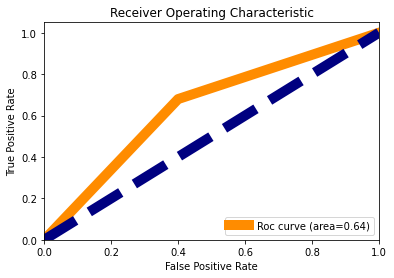

In [60]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Model Saving

In [61]:
import pickle
filename='Loan_Application.pk1'
pickle.dump(lr,open(filename,'wb'))

# Conclusion

In [62]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
df_com

,original,predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
118,1,1
119,1,1
120,1,1
121,0,1
